In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score


In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns

In [3]:
# load the iris dataset.
df = sns.load_dataset("iris")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape # roes and columns

(150, 5)

In [6]:
# basic data exploration.
print("\nBasic Information about Dataset:")
print(df.info()) # overviwe of dataset


Basic Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

<Figure size 1200x800 with 0 Axes>

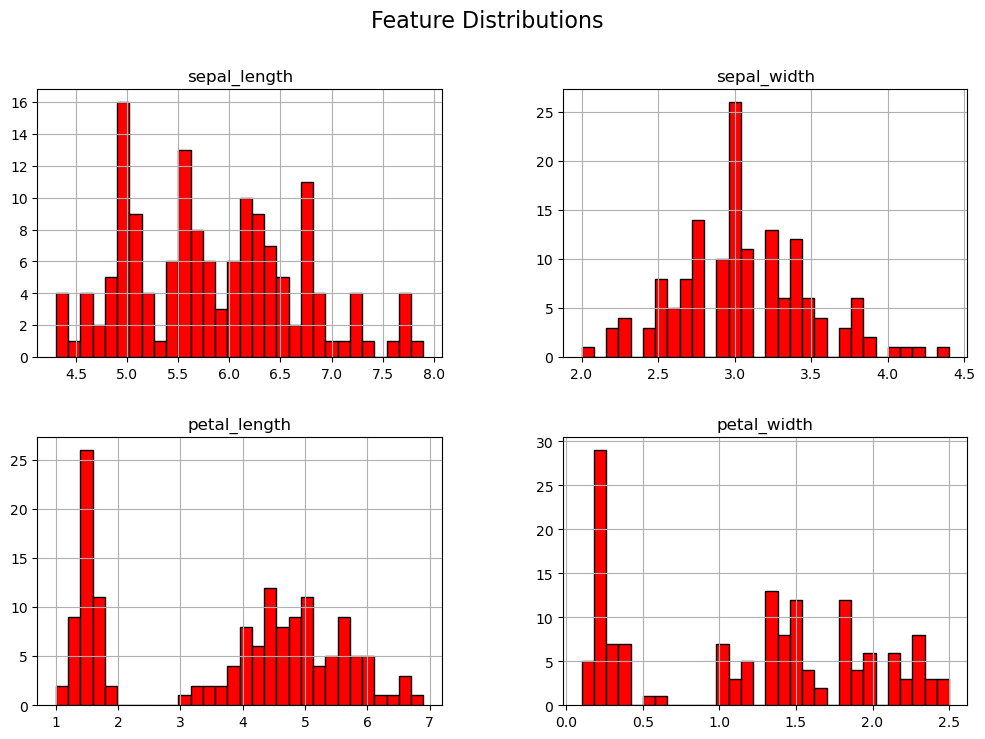

In [13]:
# univariate analysis
# histogram for distribution of feature

plt.figure(figsize=(12,8))
df.hist(figsize=(12,8),bins=30,color='r',edgecolor='black')
plt.suptitle("Feature Distributions",fontsize=16)
plt.show()

#### <b><u> Inferences from Histogram:</b></u>
1. **sepal length**:
- the distribution of sepal length appears to be roughly normal with a slight skew towards the right.
-  most of the sepal lenhgth fall between 4.5 and 7.5 cm.

2. **sepal width**:
- the distribution of sepal width is also roughly normal but with a slight skew towards the left.
-  most of the sepal widths fall between 2.5 and 3.5 cm.

3. **petal length**:
- the distribution of petal length is more spread out and shows a clear separation between different species.
-  there are distinct peaks indicating the presence of different species with varying petal lengths.

4. **petal width**:
- similar to petal length, the distribution of petal width shows clear separation between speices.
- there are distinct peaks indicating the presence of different speices with varying petal widths.

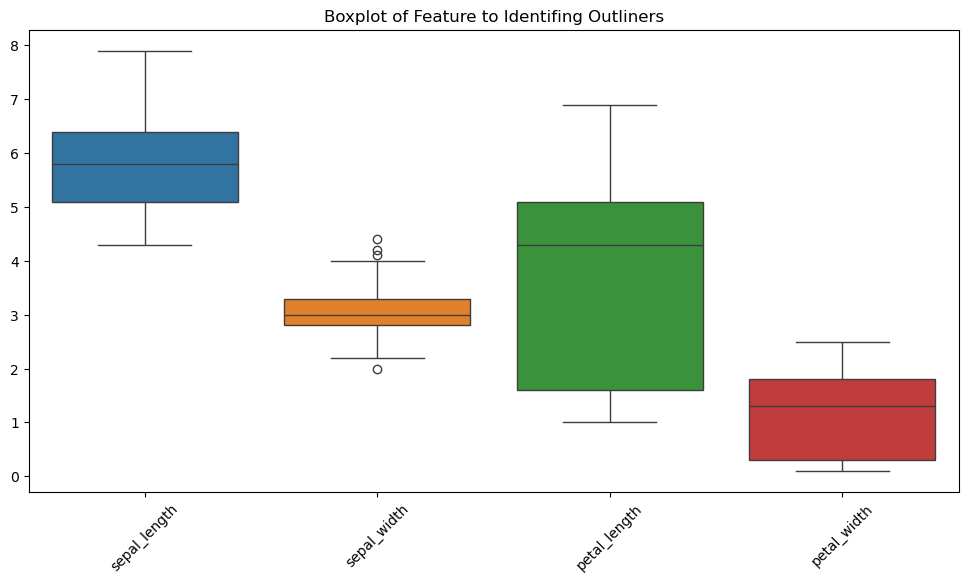

In [14]:
# Boxplots for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Feature to Identifing Outliners")
plt.show()

#### <b><u> Inference from Boxplot:</b></u>

1. **Sepal length**:
- there are a few outliers in the sepal length distribution.
- the median sepal length is around 5.8 cm, with the interquartile range(IQR) between 5.1 and 6.4cm.

2. **sepal width**:
- there are several outliers in the sepal width distribution
-  the median sepal width is around 3.0 cm, width the IQR between 2.8 and 3.3 cm.

3. **petal length**:
- the petal distribution shows clear separation between species,with minimal overlap.
- the median petal lenght varies significantly between species,indicating it is a good feature for classification.

4. **petal width**:
- similar to petal length,the petal width distibution shows clear separation between species.
- the median petal width varies significantly between species,idicating it is also a good feature for classification.



In [19]:
num_col = df.select_dtypes(include=[np.number]).columns
cat_col = df.select_dtypes(include=['object']).columns
print(f"numerical_data {num_col}")
print(f"categorical_data {cat_col}")


numerical_data Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
categorical_data Index(['species'], dtype='object')


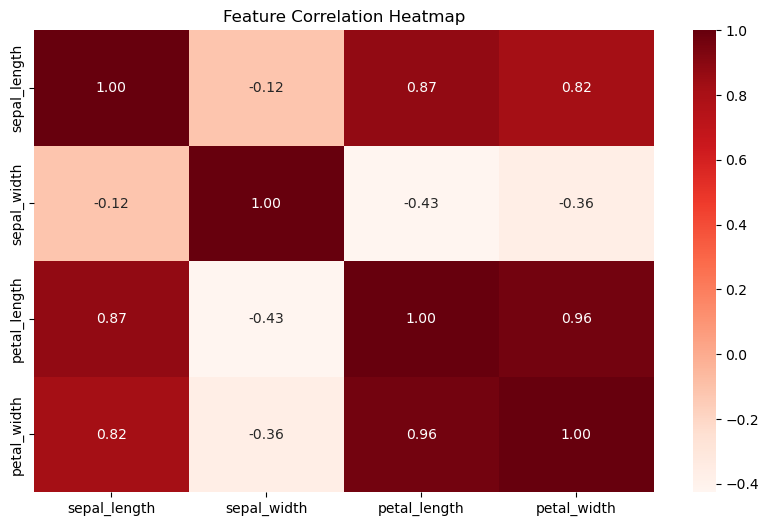

In [25]:
# correlation matrix
num=df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,6))
corr_matrix = df[num].corr('pearson')
sns.heatmap(corr_matrix,annot=True,cmap='Reds',fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

#### <b> based on th hitmap of the correation matrix,we can infer the folloing <b>

1. **speal length**:
- positively correlated with petal length (0.87) and petal width (0.82).
- weak negative correlation with sepal width(-0.12).
  
2. **sepal width**:
- weak negative correlation with sepal length (-0.12),petal length (-0.43),and petal width (-0.37).

3. **petal length**:
- strong positive correlation with sepal length (0.87) and petal width (0.96).
- weak negative correlation with sepal width(-0.43).

4. **petal width**:
- strong positive correlation with petal length(0.96) and sepal length (0.82).
- weak negative correlation with sepal width (-0.37).

5. **species**:
- strong positive correlation with petal length (0.95) and petal width (0.96).
- moderate positive correlation with sepal length (0.78).
- moderate nagetive correlation with sepal length (-0.43).


In [26]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [27]:
# encode target labels.
label_encoder = LabelEncoder()
df["species"] = label_encoder.fit_transform(df["species"])

In [28]:
# define features and target
x = df.drop(columns=["species"]) # all feature except species
y = df["species"] # target feature

In [29]:
# split into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
# function to evaluate k-nn for 
def evaluate_knn(k_values,weights='uniform'):
    results = {}
    for k in k_values:
         knn = KNeighborsClassifier(n_neighbors=k,weights=weights)
        
         knn.fit(x_train,y_train)
         y_pred = knn.predict(x_test)
         accuracy = accuracy_score(y_test,y_pred)
         f1 = f1_score(y_test,y_pred,average='weighted')
         results[k] = {'accuracy':accuracy,'f1_score':f1}
    return results

In [37]:
# test for k = 3,5,7
k_values = [3,5,7]
regular_knn_results = evaluate_knn(k_values,weights='uniform')
weighted_knn_results = evaluate_knn(k_values,weights='distance')

In [38]:
# convert results to DataFrame for comparison
results_df = pd.DataFrame.from_dict({
    'regular k-NN': regular_knn_results,
    'weighted k-NN': weighted_knn_results
},orient='index').T
results_df

,regular k-NN,weighted k-NN
3,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"
5,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"
7,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"
